In [2]:
import cv2
#from skimage.measure import compare_ssim
import argparse
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread(r'C:/Users/Admin/Downloads/kidney1.jpg',0)
path = r'C:/Users/Admin/Downloads/kidney1.jpg'

In [3]:
img.shape

(400, 400)

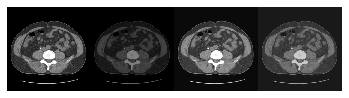

In [4]:
def point_operation(img, K, L):
    """
    Applies point operation to given grayscale image
    """
    img = np.asarray(img, dtype=np.float)
    img = img*K + L
    # clip pixel values
    img[img > 255] = 255
    img[img < 0] = 0
    return np.asarray(img, dtype = np.int)
def main():
    # read an image
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # k = 0.5, l = 0
    out1 = point_operation(gray, 0.5, 0)
    # k = 1., l = 10
    out2 = point_operation(gray, 1., 10)
    # k = 0.8, l = 15
    out3 = point_operation(gray, 0.7, 25)
    res = np.hstack([gray,out1, out2, out3])
    plt.imshow(res, cmap='gray')
    plt.axis('off')
    plt.show()
    
main()

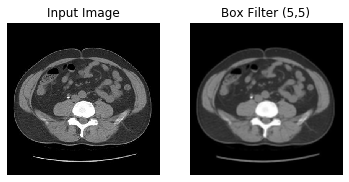

In [5]:
def plot_cv_img(input_image, output_image):
    """
    Converts an image from BGR to RGB and plots
    """
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Box Filter (5,5)')
    ax[1].axis('off')
    plt.show()
def main():
    # read an image
    img = cv2.imread(path)
    # To try different kernel, change size here.
    kernel_size = (5,5)
    # opencv has implementation for kernel based box blurring
    blur = cv2.blur(img,kernel_size)
    # Do plot
    plot_cv_img(img, blur)
    
main()

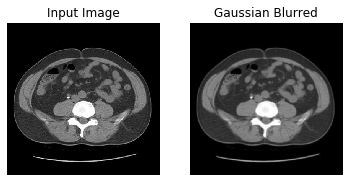

In [6]:
def plot_cv_img(input_image, output_image):
    """
    Converts an image from BGR to RGB and plots
    """
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Gaussian Blurred')
    ax[1].axis('off')
    plt.show()
def main():
# read an image
    img = cv2.imread(path)
    # apply gaussian blur,
    # kernel of size 5x5,
    # change here for other sizes
    kernel_size = (5,5)
    # sigma values are same in both direction
    blur = cv2.GaussianBlur(img,(5,5),0)
    plot_cv_img(img, blur)
    
main()

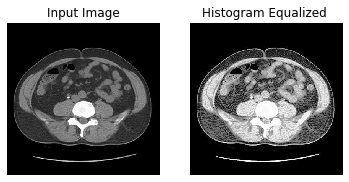

In [7]:
def plot_gray(input_image, output_image):
    """
    Converts an image from BGR to RGB and plots
    """
    # change color channels order for matplotlib
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(input_image, cmap='gray')
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    ax[1].imshow(output_image, cmap='gray')
    ax[1].set_title('Histogram Equalized ')
    ax[1].axis('off')
    plt.savefig('histogram_equalized.png')
    plt.show()
def main():
# read an image
    img = cv2.imread(path)
    # grayscale image is used for equalization
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # following function performs equalization on input image
    equ = cv2.equalizeHist(gray)
    # for visualizing input and output side by side
    plot_gray(gray, equ)
    
main()

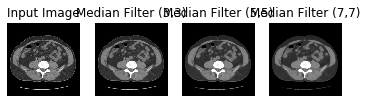

In [8]:
def plot_cv_img(input_image, output_image1, output_image2, output_image3):
    """
    Converts an image from BGR to RGB and plots
    """
    fig, ax = plt.subplots(nrows=1, ncols=4)
    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(output_image1, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Median Filter (3,3)')
    ax[1].axis('off')
    ax[2].imshow(cv2.cvtColor(output_image2, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Median Filter (5,5)')
    ax[2].axis('off')
    ax[3].imshow(cv2.cvtColor(output_image3, cv2.COLOR_BGR2RGB))
    ax[3].set_title('Median Filter (7,7)')
    ax[3].axis('off')
    plt.show()
def main():
    # read an image
    img = cv2.imread(path)
    # compute median filtered image varying kernel size
    median1 = cv2.medianBlur(img,3)
    median2 = cv2.medianBlur(img,5)
    median3 = cv2.medianBlur(img,7)
    # Do plot
    plot_cv_img(img, median1, median2, median3)
    
main()

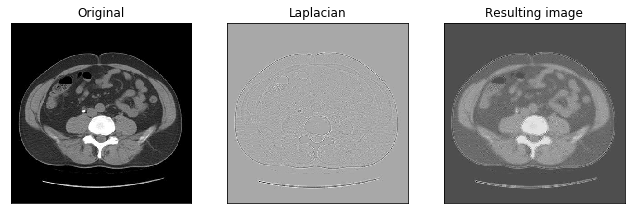

In [9]:
new_image = cv2.Laplacian(img,cv2.CV_64F)
plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img + new_image, cmap='gray'),plt.title('Resulting image')
plt.xticks([]), plt.yticks([])
plt.show()


## IMAGE ENHANCEMENT

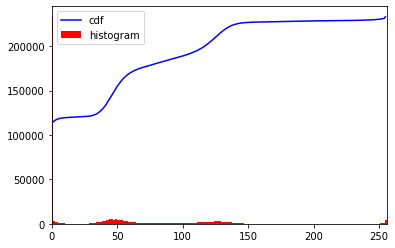

In [10]:
img = cv2.imread(path)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

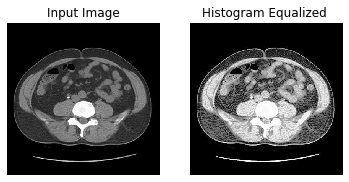

In [11]:
def plot_gray(input_image, output_image):
    """
    Converts an image from BGR to RGB and plots
    """
    # change color channels order for matplotlib
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(input_image, cmap='gray')
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    ax[1].imshow(output_image, cmap='gray')
    ax[1].set_title('Histogram Equalized ')
    ax[1].axis('off')
    plt.savefig('histogram_equalized.png')
    plt.show()
def main():
# read an image
    img = cv2.imread(path)
    # grayscale image is used for equalization
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # following function performs equalization on input image
    equ = cv2.equalizeHist(gray)
    # for visualizing input and output side by side
    plot_gray(gray, equ)
    
main()

In [12]:
img = cv2.imread(path) 
  
# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 
  
# Save the output. 
cv2.imwrite('log_transformed.jpg', log_transformed)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


True

In [13]:
img = cv2.imread(path) 
  
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 2.2]: 
      
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
  
    # Save edited images. 
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)

## IMAGE SEGMENTATION

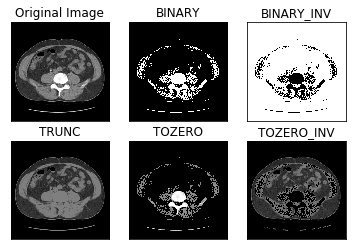

In [14]:
img = cv2.imread(path)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

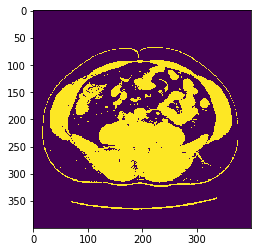

In [15]:
img = cv2.imread(path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh)

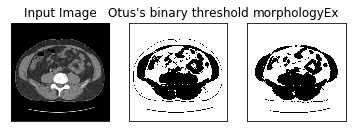

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(path)
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

plt.subplot(131),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closing, 'gray')
plt.title("morphologyEx"), plt.xticks([]), plt.yticks([])
plt.show()

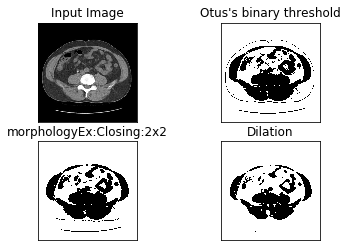

In [17]:
img = cv2.imread(path)
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

plt.subplot(221),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.show()


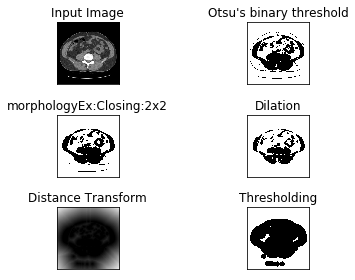

In [18]:
img = cv2.imread(path)
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

plt.subplot(321),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(323),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

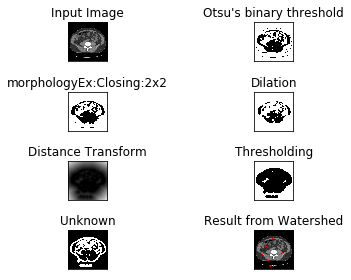

In [19]:
img = cv2.imread(path)
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(421),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(423),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.subplot(425),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

plt.subplot(427),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])

plt.subplot(428),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

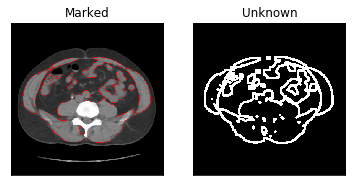

In [20]:
img = cv2.imread(path,0)

ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(thresh,'gray')
plt.title('Thresh_Binary_INV+cv2.Thresh_OTSU')
plt.xticks([]),plt.yticks([])

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.subplot(121),plt.imshow(sure_fg,'gray')
plt.title('Sure')
plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(unknown,'gray')
plt.title('Unknown')
plt.xticks([]),plt.yticks([])

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


plt.subplot(121),plt.imshow(markers,'gray')
plt.title('Marked')
plt.xticks([]),plt.yticks([])

img = cv2.imread(path)
img = cv2.medianBlur(img,5)
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img,'gray')
plt.title('Marked')
plt.xticks([]),plt.yticks([])


In [21]:
img = cv2.imread(path) 
  
gamma = 1.2
      
# Apply gamma correction. 
gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
  
# Save edited images. 
plt.show('gamma_transformed', gamma_corrected)
cv2.imwrite('gamma_transformed.jpg', gamma_corrected)

True

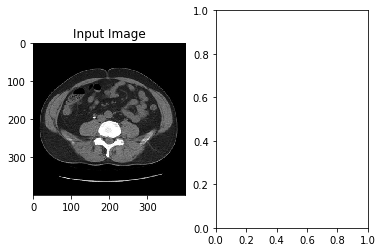

In [22]:
input_file = cv2.imread('gamma_transformed.jpg')
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(cv2.cvtColor(input_file, cv2.COLOR_BGR2RGB))
ax[0].set_title('Input Image')
plt.show()

In [23]:
import numpy as np
import cv2

# Load image and keep a copy
image = cv2.imread('gamma_transformed.jpg')
orig_image = image.copy()
cv2.imshow('Original Image', orig_image)
cv2.waitKey(0) 

# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)    
    cv2.imshow('Bounding Rectangle', orig_image)

cv2.waitKey(0) 
    
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    cv2.imshow('Approx Poly DP', image)
    
cv2.waitKey(0)   
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2

image = cv2.imread('gamma_transformed.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Original Image', image)
cv2.waitKey(0) 

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
    cv2.imshow('Convex Hull', image)

cv2.waitKey(0)    
cv2.destroyAllWindows()

In [24]:
# Load the shape template or reference image
template = cv2.imread('gamma_transformed.jpg',0)
cv2.imshow('Template', template)
cv2.waitKey()

# Load the target image with the shapes we're trying to match
target = cv2.imread('gamma_transformed.jpg')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Threshold both images first before using cv2.findContours
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = contours[1]

# Extract contours from second target image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    print(match)
    # If the match value is less than 0.15 we
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = [] 
                
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
cv2.imshow('Output', target)
cv2.waitKey()
cv2.destroyAllWindows()

1.7976931348623157e+308
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.7976931348623157e+308
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.7976931348623157e+308
1.7976931348623157e+308
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.7976931348623157e+308
1.7976931348623157e+308
0.0
1.7976931348623157e+308
0.0
0.0
0.0
0.0
0.0
1.7976931348623157e+308
0.0
0.0
0.0
1.7976931348623157e+308
0.0
0.0
0.0
0.0
0.0
1.7976931348623157e+308
0.0
0.0
0.0
0.0
0.0
0.0
1.7976931348623157e+308
0.0
0.0
0.0
1.7976931348623157e+308
1.7976931348623157e+308
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.7976931348623157e+308
0.0
0.0
0.0
0.0
1.7976931348623157e+308
0.0
0.0
0.0
0.0
1.7976931348623157e+308
1.7976931348623157e+308
0.0
0.0
0.0
0.0
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
0.0
0.0
0.0
1.7976931348623157e+308
0.0
0.0
0.0
0.0
0.0
1.7976931348623157e+308


In [ ]:
import numpy as np
import cv2

# Load and then gray scale image

image = cv2.imread('gamma_transformed.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Identifying Shapes',image)
cv2.waitKey(0)

ret, thresh = cv2.threshold(gray, 127, 255, 1)

# Extract Contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    
    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)
    
    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(image,[cnt],0,(0,255,0),-1)
        
        # Find contour center to place text at the center
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        # Check to see if 4-side polygon is square or rectangle
        # cv2.boundingRect returns the top left and then width and 
        if abs(w-h) <= 3:
            shape_name = "Square"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 125 ,255), -1)
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        else:
            shape_name = "Rectangle"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 0, 255), -1)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
            
    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(image, [cnt], 0, (255, 255, 0), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        
        
    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

    cv2.imshow('Identifying Shapes',image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [3]:
cv2.__version__

'4.1.1'

In [4]:
imutils.__version__

'0.5.3'